Connected to spyice (Python 3.12.6)

In [65]:
import numpy as np 
import matplotlib.pyplot as plt 

In [66]:
# constants 
rho_l = 1028.0
rho_s =  917.0
c_l = 3985.0
c_s = 2000.0
S_br = 233.0
T_m = 273.15 # melt temperature 
T_s = 252.05 # eutectic temperature for Sbr = 233ppt 
T_l = lambda S: (T_m + (T_s - T_m)/S_br*S)
T_l_34ppt = T_l(34.0)
L = 334774

In [67]:
T_l_34ppt

270.07103004291844

In [68]:
def H_phi(phi, T):
    H_s = rho_s*c_s*(T-T_s)    
    H_l = rho_l*L + rho_l*c_l*(T-T_l_34ppt)
    H_phi = (1-phi)*H_s + phi*H_l 
    return H_phi 

In [69]:
T_range = np.arange(240,300, 1)

In [70]:
phi_k = np.zeros(len(T_range))
nz = abs(T_s - T_l_34ppt)
for i, t in enumerate(T_range):
    if t <= T_s:
        phi_k[i] = 0.0
    elif t> T_s and t<T_l_34ppt:
        phi_k[i] = phi_k[i-1] + 1/nz
    elif t>= T_l_34ppt:
        phi_k[i] = 1.0
    else:
        print('t out of range')

In [71]:
H_k = H_phi(phi_k, T_range)

In [72]:
phi_k

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05549072, 0.11098145,
       0.16647217, 0.2219629 , 0.27745362, 0.33294434, 0.38843507,
       0.44392579, 0.49941651, 0.55490724, 0.61039796, 0.66588869,
       0.72137941, 0.77687013, 0.83236086, 0.88785158, 0.9433423 ,
       0.99883303, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

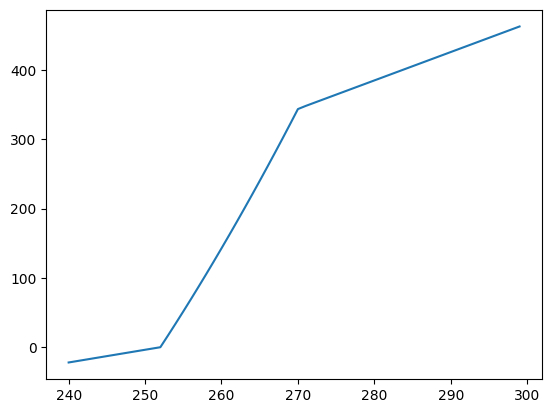

In [73]:
plt.plot(T_range,H_k/1e06)

In [96]:
H_k/1e06

array([-2.20997000e+01, -2.02657000e+01, -1.84317000e+01, -1.65977000e+01,
       -1.47637000e+01, -1.29297000e+01, -1.10957000e+01, -9.26170000e+00,
       -7.42770000e+00, -5.59370000e+00, -3.75970000e+00, -1.92570000e+00,
       -9.17000000e-02,  1.68619980e+01,  3.40668004e+01,  5.15227072e+01,
        6.92297184e+01,  8.71878340e+01,  1.05397054e+02,  1.23857378e+02,
        1.42568807e+02,  1.61531340e+02,  1.80744978e+02,  2.00209720e+02,
        2.19925567e+02,  2.39892517e+02,  2.60110573e+02,  2.80579732e+02,
        3.01299996e+02,  3.22271365e+02,  3.43493838e+02,  3.47953272e+02,
        3.52049852e+02,  3.56146432e+02,  3.60243012e+02,  3.64339592e+02,
        3.68436172e+02,  3.72532752e+02,  3.76629332e+02,  3.80725912e+02,
        3.84822492e+02,  3.88919072e+02,  3.93015652e+02,  3.97112232e+02,
        4.01208812e+02,  4.05305392e+02,  4.09401972e+02,  4.13498552e+02,
        4.17595132e+02,  4.21691712e+02,  4.25788292e+02,  4.29884872e+02,
        4.33981452e+02,  

In [95]:
H_l = H_phi(0.0, T_s)
print(H_l/1e06)

0.0


C:\Users\sneha\AppData\Local\Temp\ipykernel_24300\3287299394.py:3: RuntimeWarning: divide by zero encountered in divide
  slope_hbyphi = slope_h/slope_phi


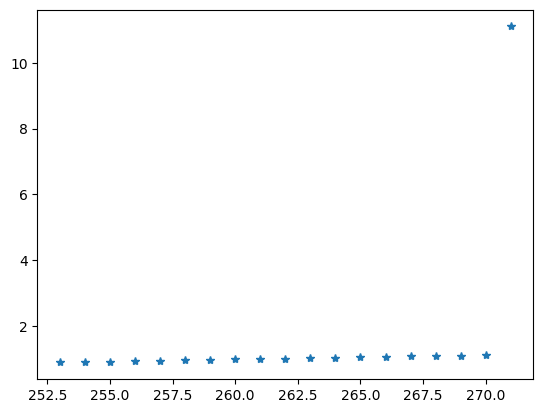

In [75]:
slope_h = (H_k[1:] - H_k[:-1])/(rho_l*L)
slope_phi = phi_k[1:] - phi_k[:-1]
slope_hbyphi = slope_h/slope_phi

L_ = L * np.ones(len(T_range))
plt.plot(T_range[1:],slope_hbyphi, '*')
#plt.plot(T_range[1:], L_[1:])

In [76]:
slope_hbyphi

array([        inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,  0.88776745,  0.90091634,  0.91406523,
        0.92721412,  0.94036301,  0.9535119 ,  0.96666079,  0.97980968,
        0.99295857,  1.00610746,  1.01925635,  1.03240524,  1.04555413,
        1.05870302,  1.07185191,  1.0850008 ,  1.09814969,  1.11129858,
       11.10387008,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf,         inf,
               inf,         inf,         inf,         inf])

In [77]:
phi_k

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05549072, 0.11098145,
       0.16647217, 0.2219629 , 0.27745362, 0.33294434, 0.38843507,
       0.44392579, 0.49941651, 0.55490724, 0.61039796, 0.66588869,
       0.72137941, 0.77687013, 0.83236086, 0.88785158, 0.9433423 ,
       0.99883303, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

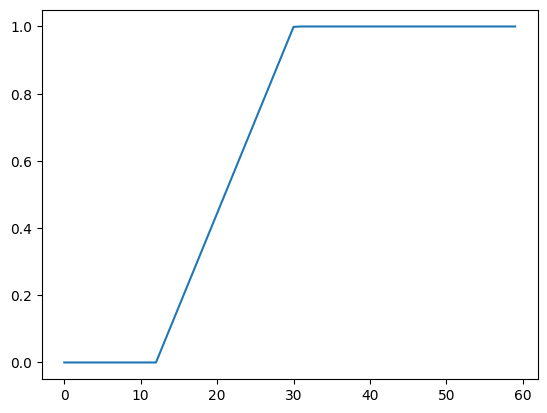

In [78]:
plt.plot(phi_k)

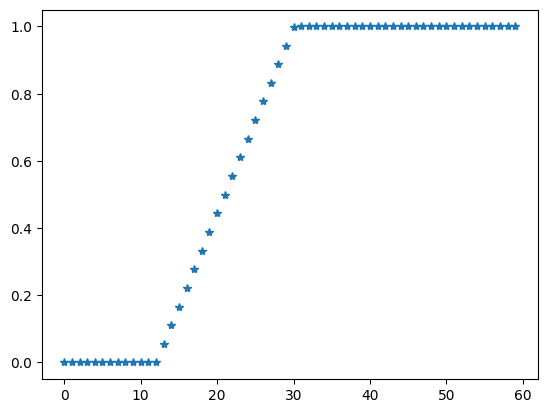

In [79]:
plt.plot(phi_k, '*')

No kernel connected

No kernel connected